# Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
import sympy as sy

# Autovalores e Autovetores

Um autovetor ($v$) é um vetor não-nulo associado a uma matriz $A$ enquanto um autovalor ($\lambda$) é um escalar que juntos guardam a seguinte relação: 

$$
A \cdot \mathbf{v} = \lambda \cdot \mathbf{v} \newline
$$

Um exemplo do livro Algebra Linear do Boldrini é o seguinte: 

$
v \rightarrow 2 \cdot v
$

Lê-se, v sofre uma transformação linear em 2 . v onde 2 é o autovalor e qualquer par (x,y) ≠ 0 é um conjunto possível de autovetores:

$$
\begin{bmatrix} 
x\\ 
y
\end{bmatrix}
=
\begin{bmatrix} 
2 & 0\\ 
0 & 2
\end{bmatrix}
\cdot
\begin{bmatrix} 
x\\ 
y
\end{bmatrix}
=
2
\begin{bmatrix} 
x\\ 
y
\end{bmatrix}
$$

In [2]:
V = np.array([2,2])

Matrix(V)

Matrix([
[2],
[2]])

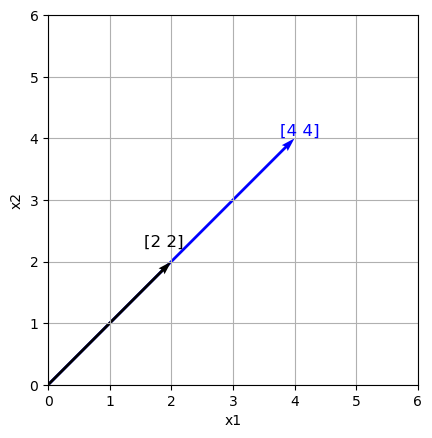

In [3]:
origem = [0, 0]
V_2 = 2 * V

plt.quiver(*origem, *V, angles='xy', scale_units='xy', scale=1, color='black')
plt.quiver(*origem, *V_2, angles='xy', scale_units='xy', scale=1, color='blue', zorder = 0)

plt.text(V[0]*1.1, V[1]*1.1, f"{V}", ha='right', va='bottom', fontsize=12, color='black')
plt.text(V_2[0]*1.1, V_2[1], f"{V_2}", ha='right', va='bottom', fontsize=12, color='blue')

x_max = 6
y_max = 6
x_min = 0
y_min = 0

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(range(x_min, x_max+1, 1))
plt.yticks(range(y_min, y_max+1, 1))
plt.xlabel('x1')
plt.ylabel('x2')

plt.gca().set_aspect('equal')
plt.grid()

## Polinômio Característico

Primeiramente, podemos encontrar os autovetores ($v$) e autovalores ($\lambda$) a partir das manipulações abaixo:

$$
A \cdot \mathbf{v} - \lambda \cdot \mathbf{v} = 0 \newline
$$
$$
(A - \lambda \cdot I) \cdot \mathbf{v} = 0
$$

Encontramos os autovalores resolvendo o determinante abaixo: 

$$
\det(A - \lambda \cdot I) = 0
$$

O polinômio característico de uma matriz quadrada \( A \) é dado por:

$$
p \ (\lambda) = \det \ (A - \lambda \cdot I)
$$

Para uma matriz ( $2 \times 2$ ):

$$
A = 
\begin{bmatrix} 
a & b \\ 
c & d 
\end{bmatrix}
$$

O polinômio característico é:

$$
\begin{pmatrix}
\begin{bmatrix} 
a & b \\ 
c & d 
\end{bmatrix}
-
\begin{bmatrix} 
\lambda & 0 \\ 
0 & \lambda
\end{bmatrix}
\end{pmatrix}
.
\begin{bmatrix} 
x_1 \\ 
x_2 
\end{bmatrix}
\cdot
\begin{bmatrix} 
0 \\ 
0 
\end{bmatrix}
$$

O que resulta em:

$$
\begin{bmatrix} 
a - \lambda & b \\ 
c & d - \lambda
\end{bmatrix}
.
\begin{bmatrix} 
x_1 \\ 
x_2 
\end{bmatrix}
=
\begin{bmatrix} 
0 \\ 
0 
\end{bmatrix}
$$

A solução é dada calculando o determinante da matriz para cada um dos $\lambda$:

$$
\det\begin{pmatrix} a - \lambda & b \\ c & d - \lambda \end{pmatrix} \newline
$$
$$
\lambda^2 - (a + d) \ . \lambda + (a\ .d - b\ .c)
$$

Após encontrar os $\lambda$ podemos substituir para encontrar os autovetores: 

$$
(A - \lambda \cdot I) \cdot \mathbf{v} = 0
$$

Onde: 

$$
\begin{bmatrix} 
a & b \\ 
c & d 
\end{bmatrix}
\cdot
\begin{bmatrix} 
x \\ 
y 
\end{bmatrix}
=
\lambda \cdot
\begin{bmatrix} 
x \\ 
y 
\end{bmatrix}
$$

In [4]:
# Matriz 2 x 2
A = np.array([(0,2), (2,0)])

Matrix(A)

Matrix([
[0, 2],
[2, 0]])

In [5]:
# Representação do polinômio característico com Scipy
lamda = sy.symbols('lambda')
polinomio = Matrix(A).charpoly(lamda)
polinomio

PurePoly(lambda**2 - 4, lambda, domain='ZZ')

### Gráfico da Matriz A

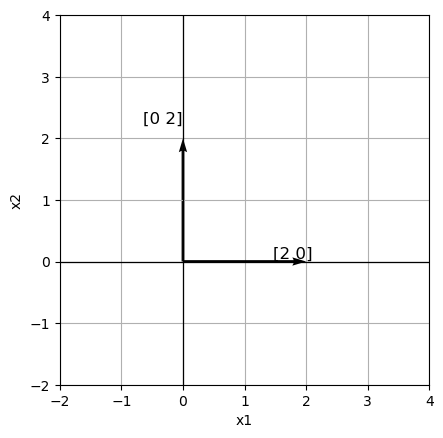

In [6]:
origem = [0, 0]

plt.quiver(*origem, *A[:,0], angles='xy', scale_units='xy', scale=1, color='black')
plt.quiver(*origem, *A[:,1], angles='xy', scale_units='xy', scale=1, color='black', zorder=3)

plt.text(A[:,0][0]*1.1, A[:,0][1]*1.1, f"{A[:,0]}", ha='right', va='bottom', fontsize=12, color='black')
plt.text(A[:,1][0]*1.05, A[:,1][1]*1.05, f"{A[:,1]}", ha='right', va='bottom', fontsize=12, color='black')

plt.axhline(0, linestyle='-', linewidth=0.9, c='black')
plt.axvline(0, linestyle='-', linewidth=0.9, c='black')

x_max = 4
y_max = 4
x_min = -2
y_min = -2

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(range(x_min, x_max+1, 1))
plt.yticks(range(y_min, y_max+1, 1))
plt.xlabel('x1')
plt.ylabel('x2')

plt.gca().set_aspect('equal')
plt.grid()

## Autovalores e Autovetores com Numpy

O numpy possuí a função linalg.eig(A) para o cálculo de autovalores e autovetores. 

https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [7]:
autovalores, autovetores = np.linalg.eig(A)

# Eigenvalues
autovalores

array([ 2., -2.])

Neste caso podemos vizualizar que os autovetores (x, y) quando a seguinte relação x = y

In [8]:
# Eigenvectors
autovetores

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [9]:
produto =  autovalores[0] * np.array([1,1])

Matrix(produto)

Matrix([
[2.0],
[2.0]])

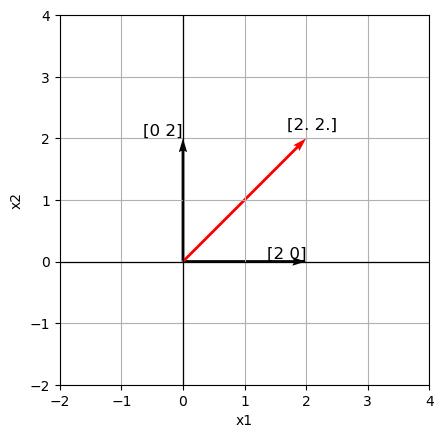

In [10]:
origem = [0, 0]

plt.quiver(*origem, *A[:,0], angles='xy', scale_units='xy', scale=1, color='black')
plt.quiver(*origem, *A[:,1], angles='xy', scale_units='xy', scale=1, color='black')
plt.quiver(*origem, *produto, angles='xy', scale_units='xy', scale=1, color='red')

# Vetores da Matriz
plt.text(A[:,0][0], A[:,0][1], f"{A[:,0]}", ha='right', va='bottom', fontsize=12, color='black')
plt.text(A[:,1][0], A[:,1][1], f"{A[:,1]}", ha='right', va='bottom', fontsize=12, color='black')

# Vetores (Autovalores . Autovetores)
plt.text(produto[0]*1.25, produto[1]*1.05, f"{np.round(produto, 1)}", ha='right', va='bottom', fontsize=12, color='black')

plt.axhline(0, linestyle='-', linewidth=0.9, c='black')
plt.axvline(0, linestyle='-', linewidth=0.9, c='black')

x_max = 4
y_max = 4
x_min = -2
y_min = -2

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(range(x_min, x_max+1, 1))
plt.yticks(range(y_min, y_max+1, 1))
plt.xlabel('x1')
plt.ylabel('x2')

plt.gca().set_aspect('equal')
plt.grid()
plt.show()

Os autovalores $\lambda $ e autovetores $\mathbf{v}$ que encontramos indicam tanto a direção quanto a magnitude da transformação linear associado a matriz A. No exemplo abaixo multiplicamos a matriz A por 2. 

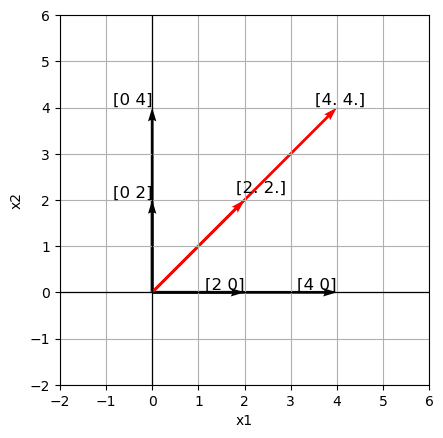

In [11]:
origem = [0, 0]

k = 2

plt.quiver(*origem, *A[:,0], angles='xy', scale_units='xy', scale=1, color='black')
plt.quiver(*origem, *A[:,0]*k, angles='xy', scale_units='xy', scale=1, color='black')
plt.quiver(*origem, *A[:,1], angles='xy', scale_units='xy', scale=1, color='black')
plt.quiver(*origem, *A[:,1]*k, angles='xy', scale_units='xy', scale=1, color='black')
plt.quiver(*origem, *produto, angles='xy', scale_units='xy', scale=1, color='red')
plt.quiver(*origem, *produto*k, angles='xy', scale_units='xy', scale=1, color='red')

# Vetores da Matriz
plt.text(A[:,0][0], A[:,0][1], f"{A[:,0]}", ha='right', va='bottom', fontsize=12, color='black')
plt.text(A[:,1][0], A[:,1][1], f"{A[:,1]}", ha='right', va='bottom', fontsize=12, color='black')
plt.text(A[:,0][0]*k, A[:,0][1]*k, f"{A[:,0]*k}", 
         ha='right', va='bottom', fontsize=12, color='black')
plt.text(A[:,1][0]*k, A[:,1][1]*k, f"{A[:,1]*k}", 
         ha='right', va='bottom', fontsize=12, color='black')

# Vetores (Autovalores . Autovetores)
plt.text(produto[0]*1.45, produto[1]*1.05, f"{np.round(produto, 1)}", 
         ha='right', va='bottom', fontsize=12, color='black')
plt.text(produto[0]*k*1.15, produto[1]*k, f"{np.round(produto*2, 1)}", 
         ha='right', va='bottom', fontsize=12, color='black')

plt.axhline(0, linestyle='-', linewidth=0.9, c='black')
plt.axvline(0, linestyle='-', linewidth=0.9, c='black')

x_max = 3*k
y_max = 3*k
x_min = -2
y_min = -2

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(range(x_min, x_max+1, 1))
plt.yticks(range(y_min, y_max+1, 1))
plt.xlabel('x1')
plt.ylabel('x2')

plt.gca().set_aspect('equal')
plt.grid()
plt.show()

## Prova Real

O objetivo desta seção é fazer a prova real da fórmula apresentada acima.

$$
A \cdot \mathbf{v} = \lambda \cdot \mathbf{v} \newline
$$

In [12]:
np.dot(A, autovetores)

array([[ 1.41421356,  1.41421356],
       [ 1.41421356, -1.41421356]])

In [13]:
# Lembrando que autovalores são escalares
autovalores * autovetores

array([[ 1.41421356,  1.41421356],
       [ 1.41421356, -1.41421356]])

## Obter a Matriz Original

$$
A \cdot \mathbf{v} = \lambda \cdot \mathbf{v} \newline
$$

Não há uma operação de divisão de matrizes, eu posso dividir os termos de uma matriz por um escalar, mas eu não posso dividir uma matriz 2x2 por outra 2x2, por exemplo. No caso, ao passar os autovetores de um lado para o outro eu multiplico pela sua inversa. 

$$
A =  \mathbf{v}\cdot \lambda \cdot \mathbf{v}^{-1} \newline
$$ 

Para que a operação possa ser feita adequadamente, os autovalores ($\lambda$) precisam ser organizados na forma de uma matriz diagonal para que a operação possa ser realizada que é representado por $\Lambda$: 

$$
A =  \mathbf{V}\cdot \Lambda \cdot \mathbf{V}^{-1}
$$ 

In [14]:
np.linalg.inv(autovetores)

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [15]:
np.diag(autovalores)

array([[ 2.,  0.],
       [ 0., -2.]])

In [16]:
autovetores

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [19]:
np.round(np.dot(autovetores, np.dot(np.diag(autovalores), np.linalg.inv(autovetores))),2)

array([[ 0.,  2.],
       [ 2., -0.]])